In [1]:
# importacao das bibliotecas utilizadas
import numpy as np
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [17]:
# funcoes extras
def plot_images(img1, img2):
    f = plt.figure(figsize=(15,8))
    
    f.add_subplot(1,2,1)
    plt.imshow(img1)
    
    f.add_subplot(1,2,2)
    plt.imshow(img2)
    
    plt.show()

### (1)

In [2]:
# importacao das imagens
baboon = plt.imread('imgs/baboon.png')
monalisa = plt.imread('imgs/monalisa.png')
peppers = plt.imread('imgs/peppers.png')
watch = plt.imread('imgs/watch.png')

### (2) e (3)

In [3]:
n_colors = [16,32,64,128]

In [4]:
def create_codebook(n_color, image):
    image = np.array(image, dtype = np.float64) / 255
    w, h, d = original_shape = tuple(image.shape)
    image_array = np.reshape(image, (w * h, d))
    array_sample = shuffle(image_array, random_state=0)[:1000]
    kmeans = KMeans(n_clusters=n_color, random_state=0).fit(array_sample)
    labels = kmeans.predict(image_array)
    return kmeans, labels

In [6]:
baboons_codebooks = []
monalisas_codebooks = []
for i in n_colors:
    kmeans_baboon, labels_baboon = create_codebook(i,baboon)
    baboons_codebooks.append((kmeans_baboon,labels_baboon))
    
    kmeans_monalisa, labels_monalisa = create_codebook(i,monalisa)
    monalisas_codebooks.append((kmeans_monalisa, labels_monalisa))

### (4)

In [7]:
def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    image = image * 255
    return image

In [11]:
baboons_results = []
for code in baboons_codebooks:
    w, h, d = tuple(baboon.shape)
    img = recreate_image(code[0].cluster_centers_, code[1], w, h)
    baboons_results.append(img)

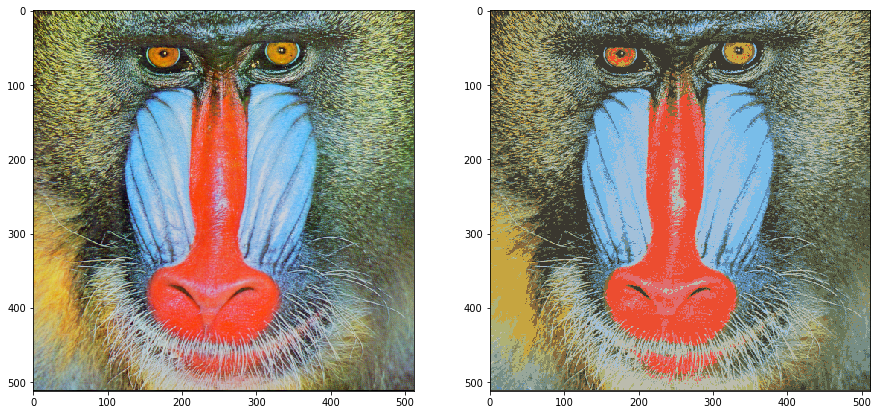

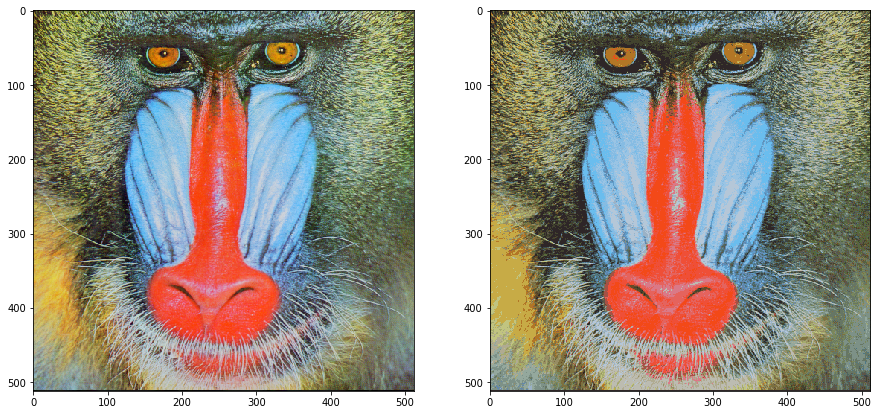

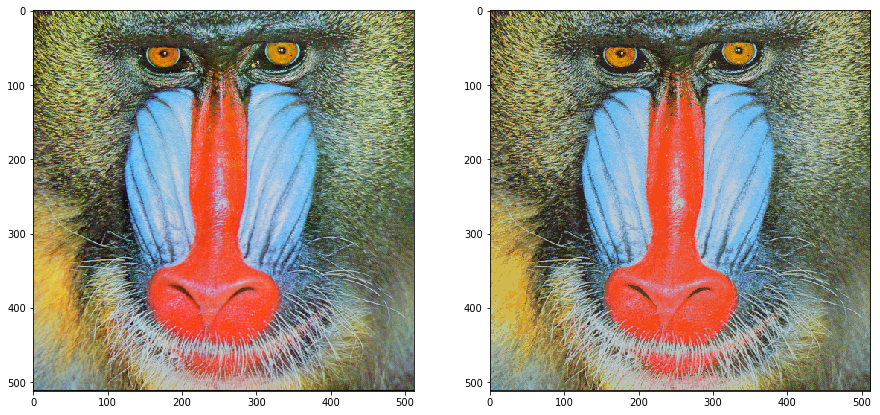

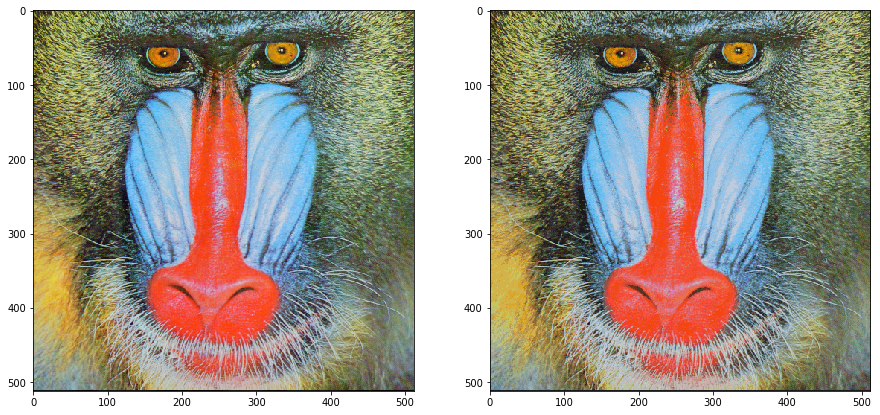

In [18]:
plot_images(baboon, baboons_results[0])
plot_images(baboon, baboons_results[1])
plot_images(baboon, baboons_results[2])
plot_images(baboon, baboons_results[3])

In [20]:
plt.imsave('resultados/baboon_16.png',baboons_results[0])
plt.imsave('resultados/baboon_32.png',baboons_results[1])
plt.imsave('resultados/baboon_64.png',baboons_results[2])
plt.imsave('resultados/baboon_128.png',baboons_results[3])

In [16]:
monalisas_results = []
for code in monalisas_codebooks:
    w, h, d = tuple(monalisa.shape)
    img = recreate_image(code[0].cluster_centers_, code[1], w, h)
    monalisas_results.append(img)

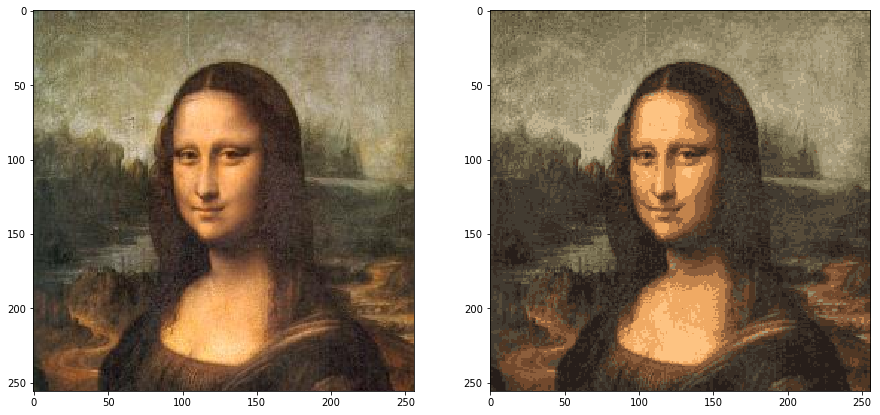

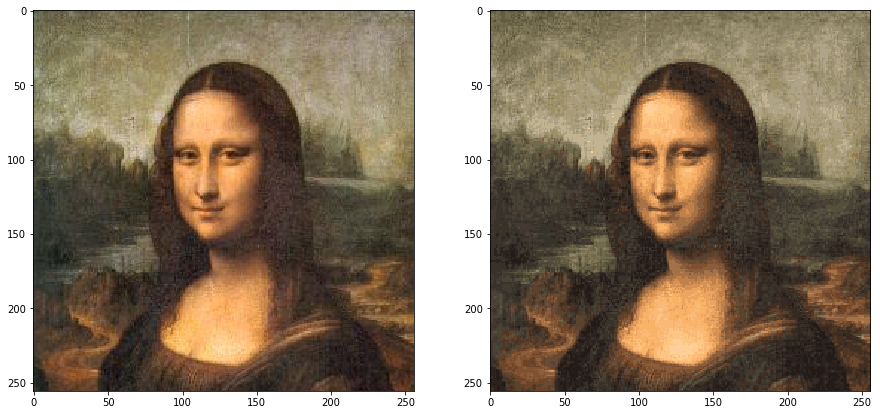

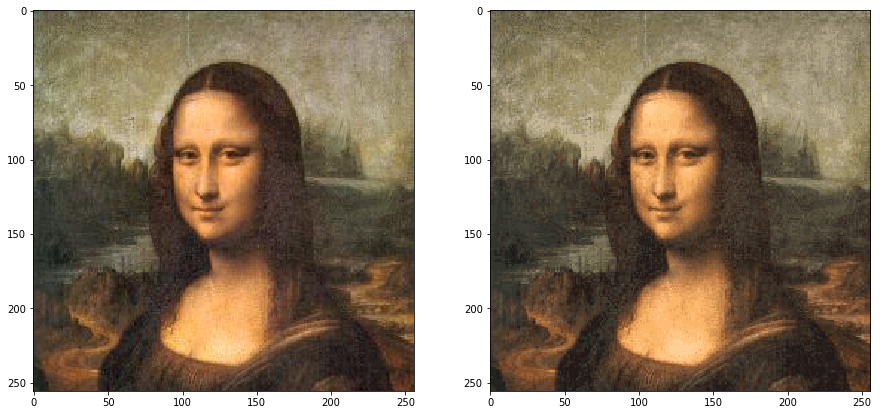

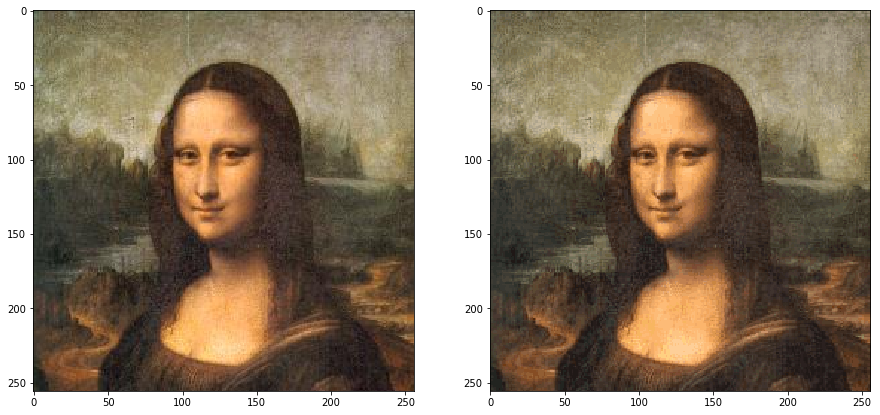

In [19]:
plot_images(monalisa, monalisas_results[0])
plot_images(monalisa, monalisas_results[1])
plot_images(monalisa, monalisas_results[2])
plot_images(monalisa, monalisas_results[3])

In [21]:
plt.imsave('resultados/monalisa_16.png', monalisas_results[0])
plt.imsave('resultados/monalisa_32.png', monalisas_results[1])
plt.imsave('resultados/monalisa_64.png', monalisas_results[2])
plt.imsave('resultados/monalisa_128.png', monalisas_results[3])